In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

train = pd.read_csv('train.csv')

train.groupby('Pclass')['Age'].mean()

def fill_age(passenger):
    age = passenger[0]
    pclass = passenger[1]
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 29
        else:
            return 25
    else:
        return age

train['Age'] = train[['Age','Pclass']].apply(fill_age,axis=1)

train.drop('Cabin',axis=1,inplace=True)

gender = pd.get_dummies(train['Sex'], drop_first=True)
# print(gender)

embark = pd.get_dummies(train['Embarked'], drop_first=True)
# print(embark)

train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train = pd.concat([train,gender,embark],axis=1)

train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


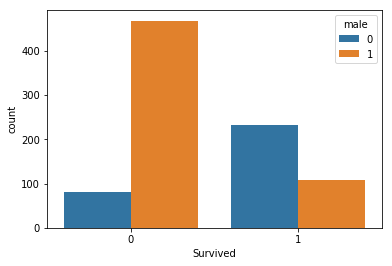

In [2]:
# 0 is DEAD
# orange is male
# blue is female
sns.countplot(x='Survived',hue='male',data=train)

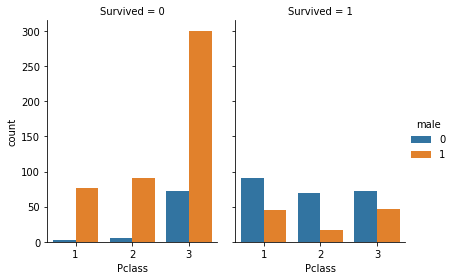

In [3]:
sns.catplot(x="Pclass", hue="male", col="Survived", data=train, kind="count", height=4, aspect=.7)

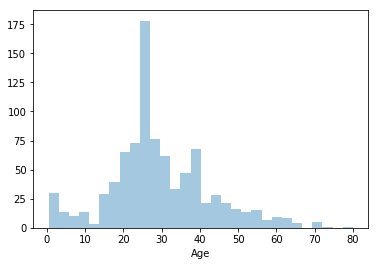

In [4]:
sns.distplot(train['Age'], bins=30, kde=False)

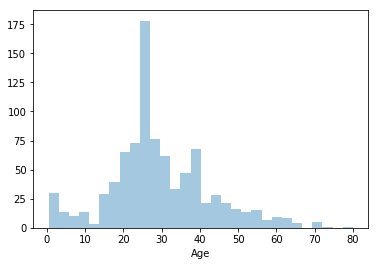

In [5]:
sns.distplot(train['Age'].dropna(), bins=30, kde=False)

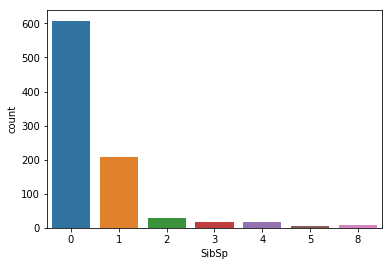

In [6]:
sns.countplot(x='SibSp',data=train)

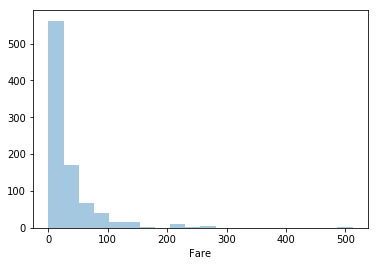

In [7]:
sns.distplot(train['Fare'], bins=20, kde=False)

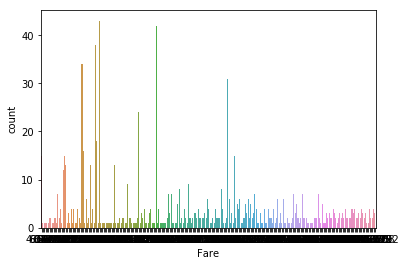

In [8]:
sns.countplot(x='Fare',data=train)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis=1),train['Survived'],test_size=0.30,random_state=101)

In [10]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

/opt/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       154
           1       0.79      0.64      0.71       114

   micro avg       0.78      0.78      0.78       268
   macro avg       0.78      0.76      0.76       268
weighted avg       0.78      0.78      0.77       268



In [12]:
import pickle
pickle.dump(logmodel, open("model.pkl","wb"))